In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this notebook I'll answer to 3 questions:

- What watch more TV-Show or Movies?
- Let's see the distribution of the film for adults and children in different countries
- And another fact's. I hope you enjoy it!

In [2]:
data = pd.read_csv('data/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
data['show_id'].unique()
# You see that column 'show_id' equal just 'id', just we added letter 's'. So we can drop it
data.drop('show_id', axis=1, inplace=True)

In [4]:
# Let's replace duration with number values, like '77 min' with '77', it's be useful for our 
duration = list(data['duration'])
number_vers = []
for x in duration:
    number_vers.append(x.split(' ')[0])
number_vers[:5]

['4', '93', '78', '80', '123']

In [5]:
number_vers = np.array(number_vers, dtype='int')
data['duration'] = number_vers

In [7]:
# First, we can drop column's like cats and director
data = data.drop(['director', 'cast'], axis=1)
data.columns

Index(['type', 'title', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
data.isnull().sum()

type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [9]:
data['country'].fillna('No Data', inplace=True)

In [11]:
# We see that more tv-show and movie have a rating TV-MA, so we just miss null values with rating 'TV-MA'
data['rating'].describe()
data['rating'].fillna('TV-MA', inplace=True)

In [12]:
data['date_added'].fillna(method='backfill', inplace=True)

In [14]:
# Now we can explore our data with more accuracy.
# Added new column for more comfort
data['year_added'] = data['date_added'].apply(lambda x:x.split(' ')[-1])
data['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [15]:
data['month_added'] = data['date_added'].apply(lambda x:x.split(' ')[0])
data['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [16]:
data.columns

Index(['type', 'title', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'description', 'year_added', 'month_added'],
      dtype='object')

In [18]:
# In internet I found this list, I think it's may be useful for us
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages']  = data['rating'].replace(ratings_ages)
data['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [19]:
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January,Teens


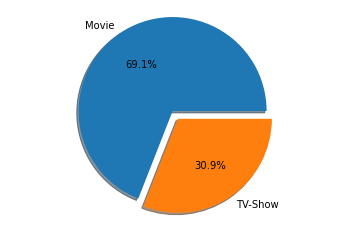

In [20]:
fig, ax = plt.subplots()
labels = ['Movie', 'TV-Show']
explode = (0, 0.1)
ax.pie(data['type'].value_counts(),labels=labels,autopct='%1.1f%%',explode=explode, shadow=True)
ax.axis('equal')
plt.show()

In [21]:
# You can see that movies more than TV-show
# And we have a answer upon our 1 question, our answer - Movie

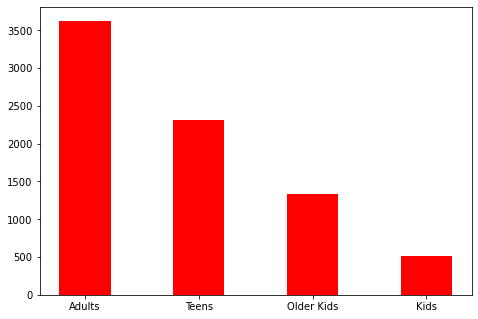

In [22]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
target_names = ['Adults','Teens','Older Kids','Kids']
counts_of_target = data['target_ages'].value_counts()
ax.bar(target_names, counts_of_target, color = 'r', width=.45)
plt.show()

In [23]:
# So, as we might expect, most adult films
# Now let's look at the distribution of adult films in different countries.

In [71]:
films_for_adults = data[data['target_ages']=='Adults']['country']
top_5_countries_adults = films_for_adults.value_counts().head()

In [ ]:
# We have top 5 countries which make more films for adult

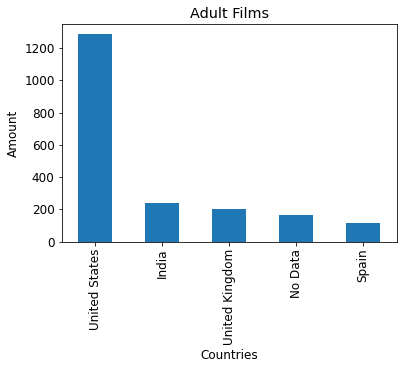

In [72]:
top_5_countries_adults.plot(kind='bar', xlabel='Countries', ylabel='Amount', title='Adult Films');

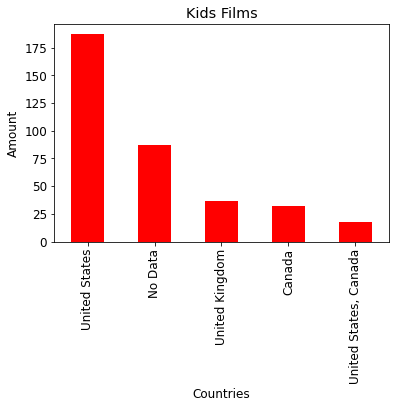

In [74]:
# And same way we can look another distribution, for example for kids
films_for_kids = data[data['target_ages']=='Kids']['country']
top_5_countries_kids = films_for_kids.value_counts().head()
top_5_countries_kids.plot(kind='bar', xlabel='Countries', ylabel='Amount', title='Kids Films', color='r');

Unfortunately, we don't see the second position, and the United States occurs twice in our data, anyway, in any comparison with the U.S. ranks first.
And we got the answer in our second question, if we can call it so.

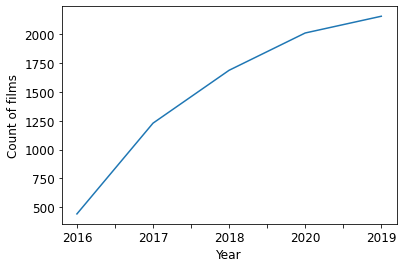

In [88]:
added_year = data['year_added'].value_counts().head()
added_year[::-1].plot(xlabel='Year', ylabel='Count of films');
# And another fact, that amount of films increasingly every year

Yeah, maybe you didn't learn anything new, I just 'recruit' in data analysis, I hope you'll understand me.Thank You!